# Welcome to the part 2/3 of my series in processig text in NLP

## If you haven't viewed my previous part, I highly recommend it. That way it's easier to follow in this one

### For this part, we will:<br>- Tokenize words<br>- Remove stop words<br>- Create a DTM

#### Libraries needed for this notebook: pandas, spaCy, 

In [5]:
# Import pickled data using pandas

import pandas as pd
pd.set_option('max_colwidth', 999999999)

transcripts = pd.read_pickle("clean_corpus.pkl")

transcripts

transcript
carlin                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

# DTM - Document Term Matrix

### With a DTM we can present each word from each comedian and by using CountVectorizer<br>we can tokenize (isolate) each word and count how many times a specific word has been said.<br><br>By inserting ---> stop_words='english' <--- inside the CountVectorizer parameter, we remove<br> unnecessary words like "are", "we", "is", "the" et.c.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
cv_data = cv.fit_transform(transcripts.transcript)

In [37]:
dtm_data = pd.DataFrame(cv_data.toarray(), columns = cv.get_feature_names())
dtm_data.index = transcripts.index
dtm_data

,aaagh,aah,ability,abject,able,accent,accept,acceptable,accurate,achieve,...,yesterday,yo,yoga,york,young,youngest,youtube,yulin,yummy,zoo
carlin,0,0,0,0,0,0,1,0,0,1,...,0,0,0,2,0,0,0,0,0,0
gervais,0,0,1,1,2,0,0,0,1,0,...,0,1,0,0,2,1,1,1,1,1
jefferies,1,1,0,0,1,2,0,1,0,0,...,1,0,1,0,7,0,0,0,0,0


## Let's flip the DTM-axis for easier view

In [41]:
copy_dtm_data = dtm_data

In [42]:
copy_dtm_data = copy_dtm_data.transpose()
copy_dtm_data

,carlin,gervais,jefferies
aaagh,0,0,1
aah,0,0,1
ability,0,1,0
abject,0,1,0
able,0,2,1
...,...,...,...
youngest,0,1,0
youtube,0,1,0
yulin,0,1,0
yummy,0,1,0


### Here we will print out the top 10 most common words said by each comedian

In [63]:
most_common_words = {}

for comedian in copy_dtm_data.columns:
    top = copy_dtm_data[comedian].sort_values(ascending=False).head(10)
    most_common_words[comedian] = list(zip(top.index, top.values))

most_common_words

{'carlin': [('people', 22),
  ('big', 19),
  ('fucking', 18),
  ('got', 18),
  ('want', 17),
  ('don', 16),
  ('country', 13),
  ('know', 12),
  ('shit', 12),
  ('love', 10)],
 'gervais': [('right', 111),
  ('like', 80),
  ('just', 66),
  ('don', 56),
  ('know', 55),
  ('ve', 53),
  ('said', 51),
  ('yeah', 49),
  ('fucking', 47),
  ('got', 44)],
 'jefferies': [('fucking', 142),
  ('like', 126),
  ('just', 63),
  ('right', 60),
  ('don', 53),
  ('know', 45),
  ('good', 36),
  ('people', 36),
  ('ve', 36),
  ('shit', 35)]}

### Here we will print out the 10 LEAST common words said by each comedian

In [102]:
least_common_words = {}
for comedian in copy_dtm_data.columns:
    bottom = copy_dtm_data[comedian].sort_values(ascending=True).head(10)    
    least_common_words[comedian] = list(zip(bottom.index, bottom.values))

least_common_words

{'carlin': [('aaagh', 0),
  ('patriarchy', 0),
  ('past', 0),
  ('passed', 0),
  ('party', 0),
  ('parts', 0),
  ('parton', 0),
  ('parties', 0),
  ('particularly', 0),
  ('particles', 0)],
 'gervais': [('aaagh', 0),
  ('relationship', 0),
  ('flop', 0),
  ('rely', 0),
  ('flip', 0),
  ('remade', 0),
  ('flights', 0),
  ('regular', 0),
  ('remake', 0),
  ('renowned', 0)],
 'jefferies': [('learnt', 0),
  ('named', 0),
  ('nails', 0),
  ('nachos', 0),
  ('mum', 0),
  ('mugged', 0),
  ('muffler', 0),
  ('mud', 0),
  ('mr', 0),
  ('mozzarella', 0)]}

## Let's make a word cloud, representing the most common words
### By plotting "word clouds", it's quite easy to see what words (in this case) is used the most. This kind of visualization can be very helpful in the NLP-area.

In [177]:
from wordcloud import WordCloud

word_cloud = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=250, random_state=42)

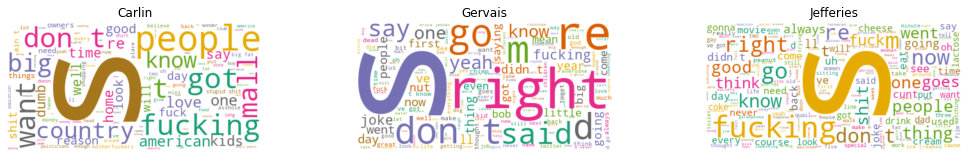

In [179]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [24, 8]

comedian_names = ['Carlin', 'Gervais', 'Jefferies']

# Create subplots for each comedian
for index, comedian in enumerate(most_common_words):
    word_cloud.generate(transcripts.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedian_names[index])
    
plt.show()

## Let's measure amount of profanity

In [181]:
from collections import Counter

Counter(most_common_words)

Counter({'carlin': [('people', 22),
          ('big', 19),
          ('fucking', 18),
          ('got', 18),
          ('want', 17),
          ('don', 16),
          ('country', 13),
          ('know', 12),
          ('shit', 12),
          ('love', 10)],
         'gervais': [('right', 111),
          ('like', 80),
          ('just', 66),
          ('don', 56),
          ('know', 55),
          ('ve', 53),
          ('said', 51),
          ('yeah', 49),
          ('fucking', 47),
          ('got', 44)],
         'jefferies': [('fucking', 142),
          ('like', 126),
          ('just', 63),
          ('right', 60),
          ('don', 53),
          ('know', 45),
          ('good', 36),
          ('people', 36),
          ('ve', 36),
          ('shit', 35)]})

In [186]:
swear_words = ['fuck', 'fucking', 'shit']

In [235]:
data = transcripts.transcript

In [241]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

KeyError: "None of [Index(['fucking', 'fuck', 'shit'], dtype='object')] are in the [index]"